In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
import matplotlib.pyplot as plt

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)
''' 
    network          : [top] <---> [pen] ---> [hid] ---> [vis] 
                               `-> [lbl] 
    lbl : label
    top : top
    pen : penultimate
    hid : hidden
    vis : visible
'''
"""
Args:
  sizes: Dictionary of layer names and dimensions
  image_size: Image dimension of data
  n_labels: Number of label categories
  batch_size: Size of mini-batch
"""
lbl=10
top=2000
pen=500
hid=500
vis=28*28
sizes={"lbl":lbl,"top":top,"pen":pen,"hid":hid,"vis":vis}
batch_size = 10
n_labels = lbl

In [3]:
#crete a DBN

dbn = DeepBeliefNet(sizes=sizes,image_size=image_size,n_labels=n_labels,batch_size=batch_size)


In [4]:
#train the dbn

n_iterations = 30
dbn.train_greedylayerwise(vis_trainset=train_imgs,lbl_trainset=train_lbls,n_iterations=n_iterations)

training vis--hid
learning CD1
iteration=      0 recon_loss=42.3601
iteration=      1 recon_loss=36.4170
iteration=      2 recon_loss=33.9771
iteration=      3 recon_loss=32.7026
iteration=      4 recon_loss=32.0468
iteration=      5 recon_loss=31.4834
iteration=      6 recon_loss=31.1567
iteration=      7 recon_loss=30.9377
iteration=      8 recon_loss=30.8481
iteration=      9 recon_loss=30.6131
iteration=     10 recon_loss=30.4346
iteration=     11 recon_loss=30.3441
iteration=     12 recon_loss=30.3311
iteration=     13 recon_loss=30.2067
iteration=     14 recon_loss=30.2025
iteration=     15 recon_loss=30.1545
iteration=     16 recon_loss=30.0878
iteration=     17 recon_loss=29.9870
iteration=     18 recon_loss=30.0566
iteration=     19 recon_loss=30.0962
iteration=     20 recon_loss=30.0769
iteration=     21 recon_loss=29.9802
iteration=     22 recon_loss=30.0681
iteration=     23 recon_loss=29.9403
iteration=     24 recon_loss=30.0371
iteration=     25 recon_loss=29.9737
iterati

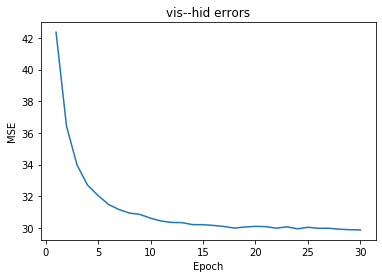

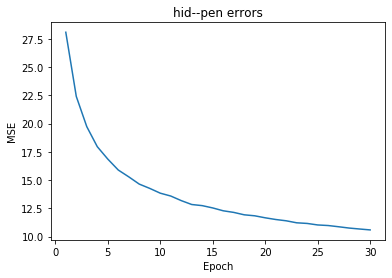

In [5]:
#show the errors of first two RBMs
x=[i+1 for i in range(n_iterations)]
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.vis_hid_errors)
plt.title("vis--hid errors")
plt.savefig("vis_hid_errors.png")
plt.show()
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.hid_pen_errors)
plt.title("hid--pen errors")
plt.savefig("hid_pen_errors.png")
plt.show()

In [6]:
dbn.recognize(test_imgs,test_lbls)

drive the network bottom to top
vis--hid
hid--pen
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
accuracy = 84.85%


In [7]:
dbn.recognize(train_imgs,train_lbls)

drive the network bottom to top
vis--hid
hid--pen
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
pen+lbl--top
accuracy = 84.41%


In [21]:
lbls = dbn.label_log

[3.22873863e-07 3.35116426e-04 7.88131315e-07 ... 1.59025955e-04
 2.49369825e-04 4.86944717e-04]
[1.30789272e-07 4.39335686e-04 5.97966409e-07 ... 2.22745311e-06
 1.74288469e-04 2.91244192e-05]
[5.63733930e-07 3.09436414e-04 5.23652431e-06 ... 1.47508591e-05
 1.70392285e-04 1.60322347e-05]
[3.86293573e-08 2.43202745e-04 8.31336337e-06 ... 1.96085387e-04
 3.36258136e-04 5.79947902e-05]
[4.47038542e-08 3.28240444e-04 2.74450446e-07 ... 2.62991792e-06
 1.18213305e-05 1.97821676e-05]
[3.64655588e-09 3.33122778e-04 3.52093278e-07 ... 4.45174291e-04
 4.30590839e-05 4.41989279e-06]
[1.31091402e-08 5.44147754e-02 5.56375202e-07 ... 4.73586553e-04
 5.03167686e-05 8.93059250e-06]
[5.58692307e-07 3.99617057e-03 7.09939760e-08 ... 5.21069502e-05
 1.69177559e-04 1.23911670e-05]
[5.79537458e-07 4.20685751e-02 8.44403183e-08 ... 1.49318736e-05
 1.13596652e-04 1.11832563e-06]
[1.04760262e-06 1.83559555e-03 5.76217793e-08 ... 2.38428108e-05
 2.53147704e-03 6.03208301e-07]
[1.41379326e-07 3.09823423e-03

From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4
From the top RBM, drive the network
generate mp4s/dbn.generate1.mp4


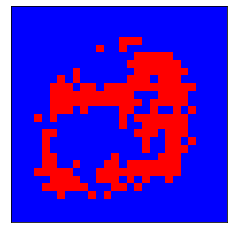

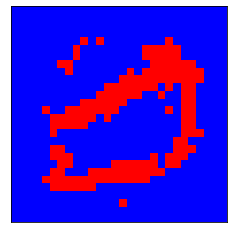

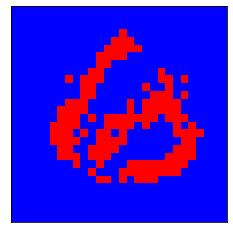

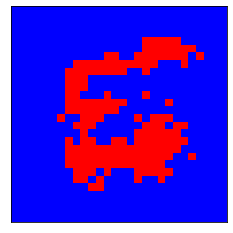

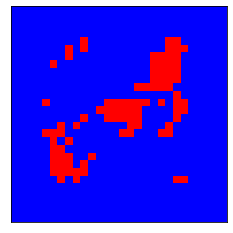

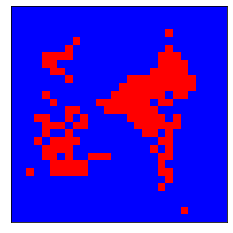

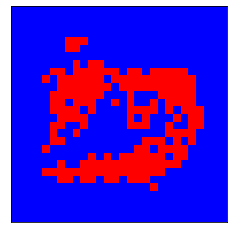

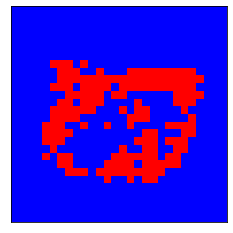

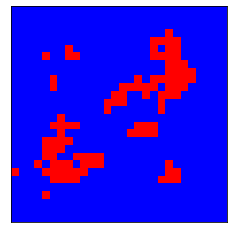

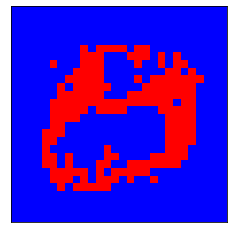

In [40]:
for digit in range(20):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,1] = 1
    dbn.generate(digit_1hot, name="dbn")